Desafio 37: Ocorrências Policiais

📂 Dataset: Registros de ocorrências policiais em uma cidade.
Colunas: ID, Data, Tipo, Bairro, Status, Envolvidos

🎯 Tarefas:

Corrija inconsistências nos nomes dos tipos de ocorrência (ex: "fUrTo").

Trate valores ausentes na coluna Status.

Qual o tipo de ocorrência mais frequente?

Quais bairros registraram mais de 40 ocorrências?

Crie um gráfico de barras horizontais mostrando o total de ocorrências por bairro.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_37_ocorrencias_policiais.csv")
df.head()

,ID,Data,Tipo,Bairro,Status,Envolvidos
0,OC0001,2024-02-25,Roubo,Alvorada,Em investigação,5
1,OC0002,2024-03-01,Furto,Vila Nova,Encerrado,1
2,OC0003,2024-02-29,Agressão,Vila Nova,Em investigação,2
3,OC0004,2024-03-07,Violência Doméstica,Centro,Sem solução,3
4,OC0005,2024-02-27,Furto,Parque Verde,Em investigação,2


In [5]:
#Corrija inconsistências nos nomes dos tipos de ocorrência (ex: "fUrTo").
df["Tipo"] = df["Tipo"].replace({"fUrTo": "Furto"})
df["Tipo"].unique()

array(['Roubo', 'Furto', 'Agressão', 'Violência Doméstica', 'Homicídio',
       'Tráfico de Drogas'], dtype=object)

In [7]:
#Trate valores ausentes na coluna Status.
df["Status"] = df["Status"].fillna("Não informado")
df["Status"].unique()

array(['Em investigação', 'Encerrado', 'Sem solução', 'Não informado'],
      dtype=object)

In [11]:
#Qual o tipo de ocorrência mais frequente?
freqOcorrencia = df["Tipo"].value_counts()
print(f"tipo de ocorrência mais frequente: {freqOcorrencia.idxmax()} com {freqOcorrencia.max()} Casos")

tipo de ocorrência mais frequente: Furto com 98 Casos


In [26]:
#Quais bairros registraram mais de 40 ocorrências?
bairroOcorrencias = df["Bairro"].value_counts()
mais40Ocorrencias = bairroOcorrencias[bairroOcorrencias >= 40]
print(f"Bairros com mais de 40 ocorrências: \n\n{mais40Ocorrencias.to_string()}")

Bairros com mais de 40 ocorrências: 

Bairro
São Jorge            85
Industrial           79
Centro               75
Vila Nova            72
Alvorada             68
Jardim das Flores    66
Parque Verde         55


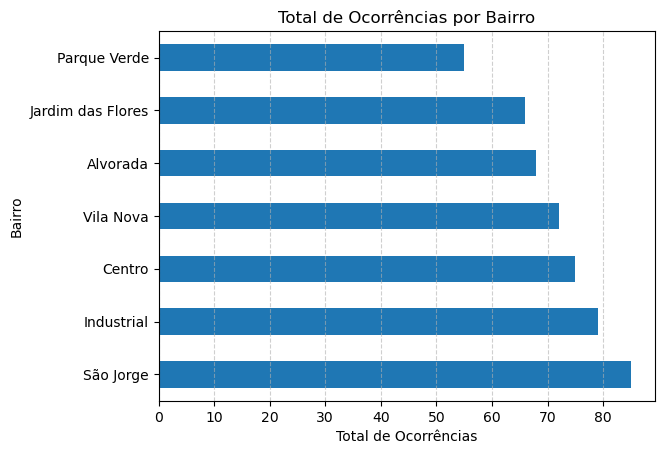

In [33]:
#Crie um gráfico de barras horizontais mostrando o total de ocorrências por bairro.
bairroOcorrencias.plot(kind="barh")
plt.title("Total de Ocorrências por Bairro")
plt.xlabel("Total de Ocorrências")
plt.ylabel("Bairro")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()